<div style="text-align: center">
    <h2>Laptop Price Prediction and Analysis</h2>
    <p></p>
</div>
<div>
    <p>By - Rohit Yadav</p>
</div>
This project aims to uncover latest trends in price of laptop and also helps in predicting price of laptop so that you can buy your dream laptop. Through data-driven analysis, we seek to hghlight the prices, and ultimately see the different laptop prices.  

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Laptop Price Analysis

In [285]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Sem4\Project - EDA\laptop_data.csv")

In [287]:
df.drop(columns='Unnamed: 0', inplace=True)

In [288]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Seeing the shape of the dataset

In [289]:
print(df.shape)

(1303, 11)


### Seeing the info of the dataset

In [290]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB
None


### Seeing the null values of the dataset

In [291]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [292]:
print(df.duplicated().sum())

29


In [293]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Data preprocessing

In [294]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [295]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

### Seeing the info of the dataset

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### Univariate Analysis of target column price

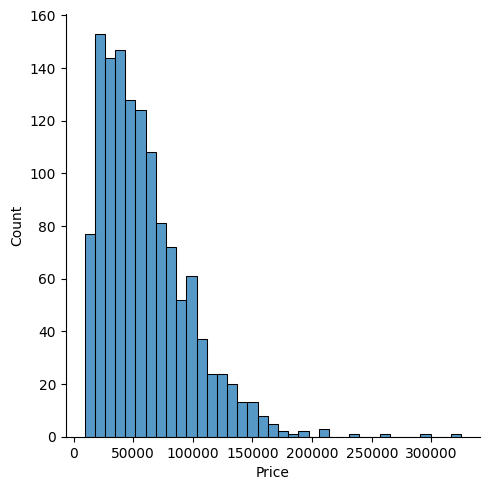

In [ ]:
sns.displot(df['Price'])

#### Analysis of the Company Column
The Company column represents the manufacturers or brands of the laptops in the dataset. This information plays a significant role in determining the laptop's overall quality, design, build, and, most importantly,

In [298]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

- Calculating the average price per company helps to identify how the pricing varies across different laptop brands. 
- By grouping the data by company and calculating the average price, you can better understand the pricing strategy of each manufacturer.

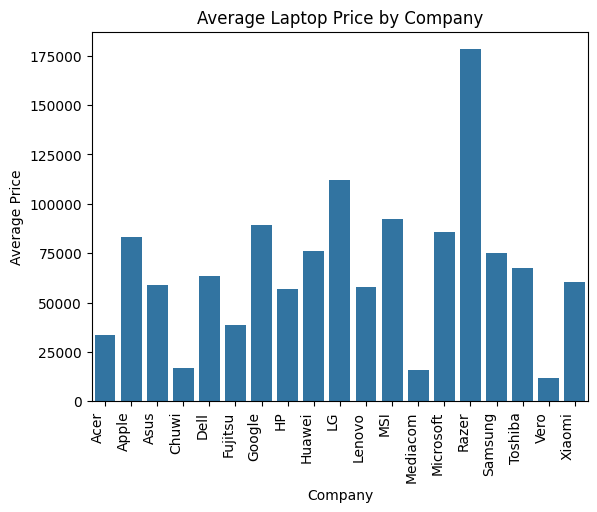

In [299]:
# Calculate average price per company
avg_price = df.groupby('Company', as_index=False)['Price'].mean()

# Plot the data
sns.barplot(x=avg_price['Company'], y=avg_price['Price'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Company')

plt.show()


- This code visualizes the distribution of laptop types in the dataset. The TypeName column likely represents the type of each laptop and this bar chart helps to see how many laptops belong to each type.

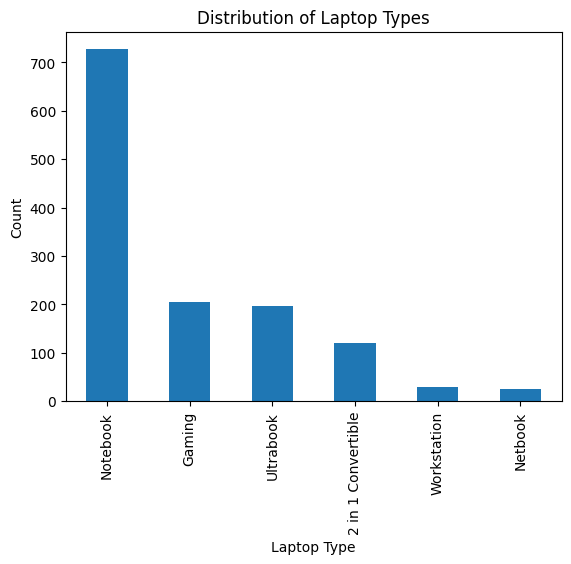

In [300]:
df['TypeName'].value_counts().plot(kind='bar')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.title('Distribution of Laptop Types')
plt.show()

- Calculating the average price per laptop type helps understand how different types of laptops are priced. It provides insights into which types are more premium or budget-friendly, aiding in market segmentation and product strategy.

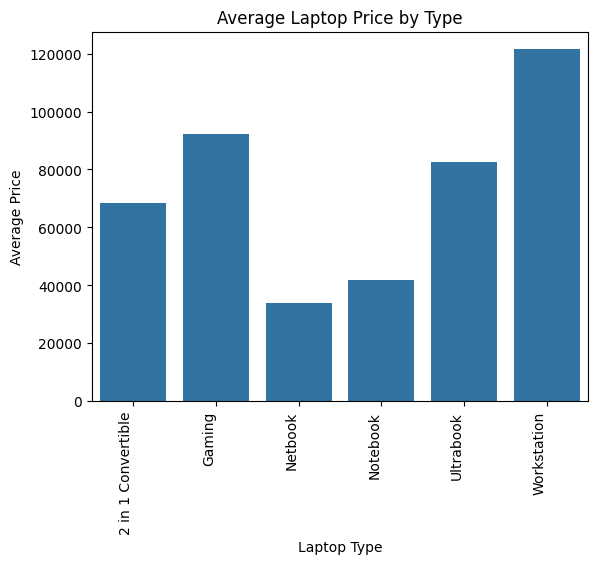

In [301]:
# Calculating average price per laptop type
avg_price_type = df.groupby('TypeName', as_index=False)['Price'].mean()

# Plot the data
sns.barplot(x=avg_price_type['TypeName'], y=avg_price_type['Price'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Laptop Type')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Type')

plt.show()



Analysis visualizes the relationship between screen size (Inches) and price of the laptops. By using a scatter plot, you can see if there’s any correlation between the size of the laptop’s screen and its price. Larger screen sizes might indicate more expensive laptops

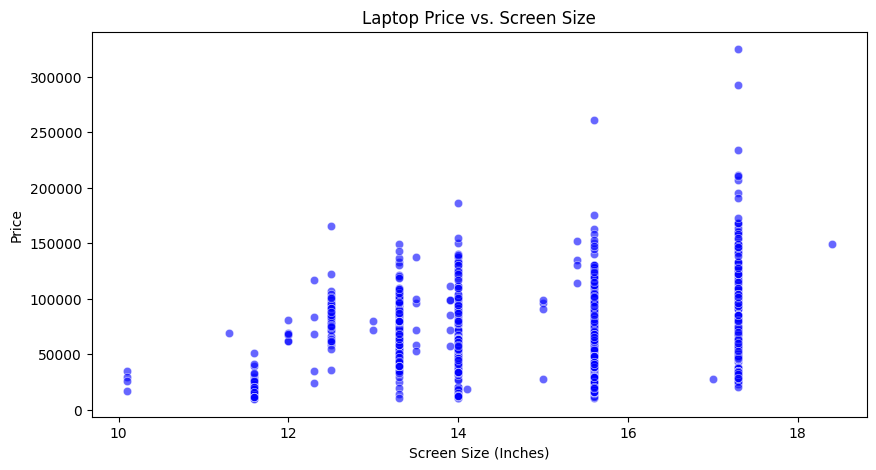

In [302]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Inches'], y=df['Price'], alpha=0.6, color='blue')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')
plt.title('Laptop Price vs. Screen Size')
plt.show()


#### Analyzing the ScreenResolution Column

1. Count the Unique Screen Resolutions: Using the value_counts() function to determine how many laptops have each screen resolution in the dataset.

In [303]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

2.  To identify laptops with a touchscreen feature, a new column called 'Touchscreen' was added to the dataset. The column was created by applying a condition to the 'ScreenResolution' column. If the resolution contains the word 'Touchscreen', the corresponding value in the 'Touchscreen' column is set to 1. Otherwise, it is set to 0. This allows us to easily analyze and filter laptops based on the presence of a touchscreen

In [304]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen'in x else 0 )
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355.2000,0
429,Mediacom,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.16,15930.7200,1
1053,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,52161.1200,0
93,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.6000,0
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0


3. Visualize the Distribution: analyze the distribution of laptops with and without touchscreens

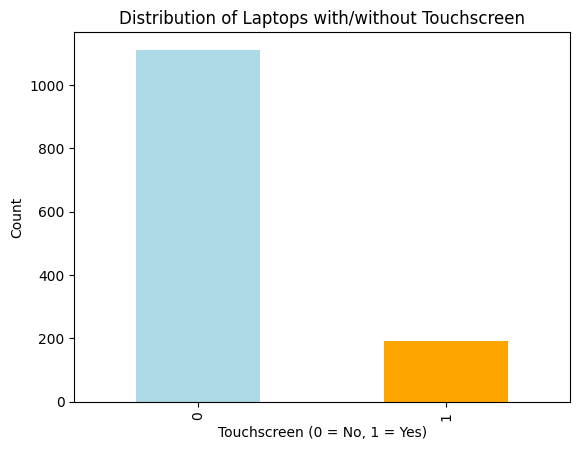

In [305]:
df['Touchscreen'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])

plt.xlabel('Touchscreen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Laptops with/without Touchscreen')

plt.show()


4. Price Comparison by Touchscreen Availability
To compare the average price of laptops with and without touchscreens, we use a bar plot. This plot displays the mean price of laptops in each category: laptops with a touchscreen (1) and those without a touchscreen (0).

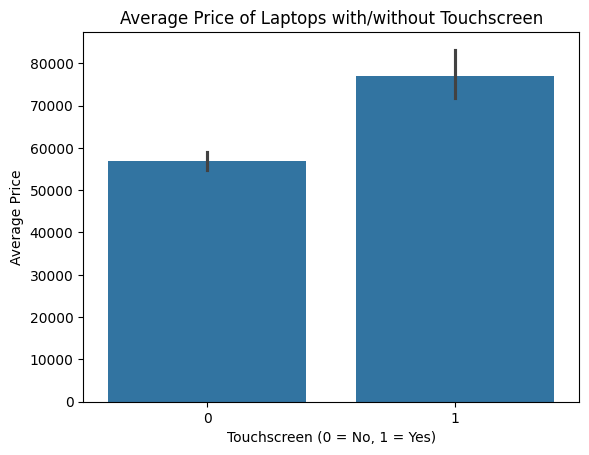

In [306]:
# Bar plot to compare average price of laptops with and without touchscreen
sns.barplot(x=df['Touchscreen'], y=df['Price'])
plt.xlabel('Touchscreen (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.title('Average Price of Laptops with/without Touchscreen')

plt.show()

#### Creation of IPS Column
A new column called 'IPS' is created to identify laptops with IPS screens based on the 'ScreenResolution' column. This column is generated by applying a lambda function that checks if the word 'Touchscreen' is present in the ScreenResolution column. If the word is found, the value is set to 1 (indicating an IPS screen); otherwise, it is set to 0. This will help us filter and analyze laptops with IPS displays.

In [307]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen'in x else 0 )
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1145,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.00,101178.72,0,0
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.80,0,0
1042,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,75924.00,0,0
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.88,0,0
293,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,97449.12,0,0


* To analyze the distribution of laptops with and without IPS Display

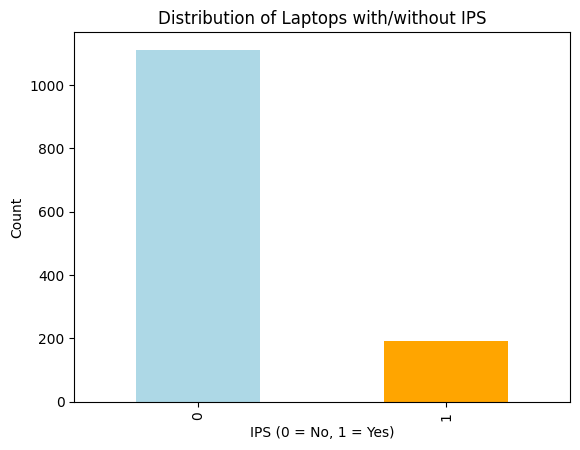

In [308]:
df['IPS'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])

plt.xlabel('IPS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Laptops with/without IPS')

plt.show()

* Price Comparison for Laptops with/without IPS Display :
This bar plot compares the average price of laptops with and without IPS displays (based on the 'IPS' column). The x-axis represents the two categories (laptops with an IPS display, marked as 1, and those without, marked as 0), while the y-axis represents the average price of laptops in each category. This analysis helps identify any significant pricing differences between laptops equipped with IPS displays and those that aren't.



Text(0.5, 1.0, 'Average Price of Laptops with/without IPS Display')

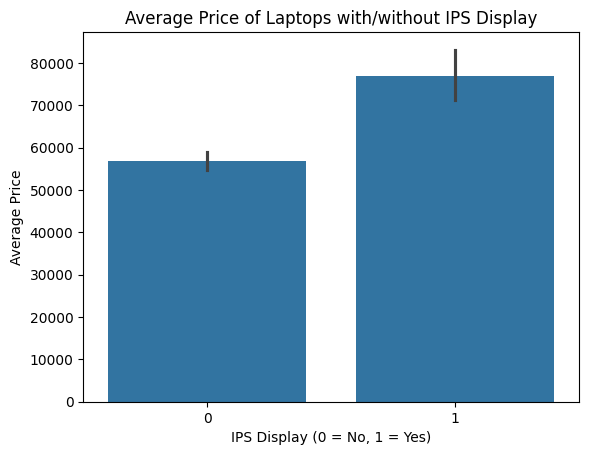

In [309]:
# Bar plot to compare average price of laptops with and without IPS Display
sns.barplot(x=df['IPS'], y=df['Price'])
plt.xlabel('IPS Display (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.title('Average Price of Laptops with/without IPS Display')

* Extract Screen Resolution into Width(x) and Height(y) : We split the 'ScreenResolution' column into width and height (x and y resolution) based on the 'x' separator.

In [310]:
# Split 'ScreenResolution' into two columns (x and y resolution)
New_Resolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

# Assign the split values to new columns
df['x_Resolution'] = New_Resolution[0]
df['y_Resolution'] = New_Resolution[1]

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_Resolution,y_Resolution
418,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.14,28768.5360,0,0,1366,768
87,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.96,31914.1872,0,0,Full HD 1920,1080
302,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.80,34578.7200,0,0,1600,900
158,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.7200,1,1,Full HD / Touchscreen 1920,1080
909,LG,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,101178.7200,1,1,IPS Panel Full HD / Touchscreen 1920,1080


* Extracting Numbers from Screen Resolution : This step replaces any commas in the 'x_Resolution' column with spaces and then extracts all numerical values (both integers and decimals) using a regular expression. This allows us to isolate the numeric components of the resolution, which can be useful for further analysis or comparison.

In [311]:
df['x_Resolution'].str.replace(',',' ').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: x_Resolution, Length: 1303, dtype: object

* Extracting and Standardizing x_Resolution Values: This step removes commas, extracts only numeric values (including decimals), and retains the first extracted number. This ensures that the 'x_resolution' column contains only clean numerical data for further analysis.

In [312]:
df['x_Resolution']=df['x_Resolution'].str.replace(',',' ').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_Resolution,y_Resolution
84,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,21045.60,0,0,1366,768
804,Dell,Netbook,11.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.63,39640.32,0,0,1366,768
280,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,45767.52,0,0,1600,900
1012,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,84715.20,0,0,1920,1080
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,66546.72,0,0,1920,1080


* Convert x_Resolution and y_Resolution columns to integer type:-
This ensures that resolution values are treated as numerical data for analysis and Make sure there are no missing or non-numeric values before conversion

In [313]:
df['x_Resolution'] = df['x_Resolution'].astype('int')
df['y_Resolution'] = df['y_Resolution'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_Resolution      1303 non-null   int64  
 14  y_Resolution      1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


* Calculating Correlation with Price
This code calculates the correlation between the 'Price' column and all other numerical columns in the dataset. The result will help identify which features are strongly related to the price of the laptops. High positive or negative correlations can provide insights into the key factors affecting the price.

In [314]:
# Calculate correlation of all numerical columns with the 'Price' column
df.select_dtypes(include=['number']).corr()['Price']


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.191226
x_Resolution    0.556529
y_Resolution    0.552809
Name: Price, dtype: float64

* Calculating Pixels Per Inch (PPI):- The code calculates the Pixels Per Inch (PPI) for each laptop. PPI is a measurement of the pixel density of the screen and can give an idea of the screen's clarity and sharpness. It is computed using the resolution (x and y) and the diagonal size of the screen in inches. The formula used is:

* ![alt text](image.png)

In [315]:
# Calculate Pixels Per Inch (PPI) based on screen resolution and size in inches
df['ppi'] = ((df['x_Resolution']**2 + df['y_Resolution']**2)**0.5) / df['Inches'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_Resolution      1303 non-null   int64  
 14  y_Resolution      1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

* Analyzing Correlation of PPI with Price:-Based on the correlation matrix, PPI (Pixels Per Inch) shows a high correlation with Price. This suggests that laptops with higher pixel density (sharper displays) tend to have higher prices. The PPI value, which reflects the display quality, may be an important factor influencing the price of the laptop.

In [316]:
df.select_dtypes(include=['number']).corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.191226
x_Resolution    0.556529
y_Resolution    0.552809
ppi             0.473487
Name: Price, dtype: float64

* Dropping Unnecessary Columns for Analysis:-
In the previous steps, I created new features such as PPI (Pixels Per Inch) based on x_Resolution, y_Resolution, and Inches. The ScreenResolution column was used to extract these values but is now redundant as we have the necessary columns for display analysis (like PPI). Additionally, the x_Resolution, y_Resolution, and Inches columns are no longer needed for further analysis since PPI captures the important information related to the display. Dropping these columns helps streamline the dataset and avoid unnecessary complexity in future analysis.

In [317]:
df.drop(columns=['Inches','x_Resolution','y_Resolution','ScreenResolution'],inplace=True)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
893,Lenovo,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,95850.720,0,0,157.350512
435,Asus,Gaming,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,90309.600,0,0,127.335675
310,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,53226.720,0,0,165.632118
1146,HP,Ultrabook,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.496,0,0,176.232574
642,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536.000,0,0,157.350512


* Extracting CPU Brand and Model Category :- The 'Cpu' column contains detailed processor descriptions. To categorize CPUs into broader groups, we extract the first three words (e.g., 'Intel Core i7', 'AMD Ryzen 5').This helps in analyzing how different CPU models impact laptop pricing and performance.

In [318]:
df['CPU Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name
770,Dell,Notebook,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Windows 10,2.300,62938.0656,0,0,141.211998,Intel Core i7
670,Microsoft,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.0480,1,1,200.842560,Intel Core i7
608,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.000,69210.7200,1,1,141.211998,Intel Core i7
952,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.200,77788.8000,0,0,165.632118,Intel Core i5
161,Acer,Notebook,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Nvidia GeForce MX150,Windows 10,3.000,42890.4000,0,0,127.335675,Intel Core i5


* Extracting CPU Brand and Model Category :- The 'Cpu' column contains detailed processor descriptions. To categorize CPUs into broader groups, we extract the first three words (e.g., 'Intel Core i7', 'AMD Ryzen 5').
This helps in analyzing how different CPU models impact laptop pricing and performance.

In [319]:
def fetch_processor(text):
    if text in ['Intel Core i3', 'Intel Core i5', 'Intel Core i7']:
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

* Extracting CPU Brand :- The 'CPU Name' column contains processor details, and using the fetch_processor function, we categorize each processor into a broader brand and model group. This allows us to group processors into 'Intel Core i3/i5/i7', 'Other Intel Processors', and 'AMD Processors,' simplifying the analysis of their impact on laptop pricing and performance.

In [320]:
df['CPU Brand'] = df ['CPU Name'].apply(fetch_processor)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name,CPU Brand
70,Microsoft,Ultrabook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,58021.92,1,1,200.842560,Intel Core i5,Intel Core i5
266,Asus,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,512GB SSD + 512GB SSD,Intel UHD Graphics 620,Windows 10,1.100,79866.72,1,1,165.632118,Intel Core i7,Intel Core i7
286,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.950,58448.16,0,0,141.211998,Intel Core i7,Intel Core i7
123,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.500,67718.88,0,0,127.335675,Intel Core i7,Intel Core i7
1124,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.000,23176.80,0,0,100.454670,Intel Core i3,Intel Core i3


* A bar plot is used to visualize the distribution of different CPU brands in the dataset. This helps in understanding the prevalence of each processor type (Intel vs AMD)

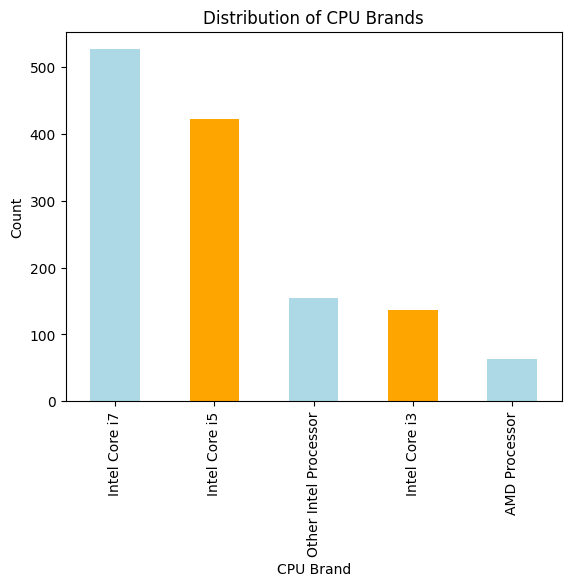

In [321]:
#Visualizing CPU Brand Distribution
df['CPU Brand'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.title('Distribution of CPU Brands')
plt.show()


* Comparing Average Price of Laptops by CPU Model:- The bar plot is used to visualize the average laptop price for each CPU model. This helps in analyzing the relationship between CPU models and their impact on laptop pricing

C:\Users\User\AppData\Local\Temp\ipykernel_6876\1264805113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['CPU Brand'], y=df['Price'], palette='Set2')  # 'Set2' is a predefined color palette in seaborn


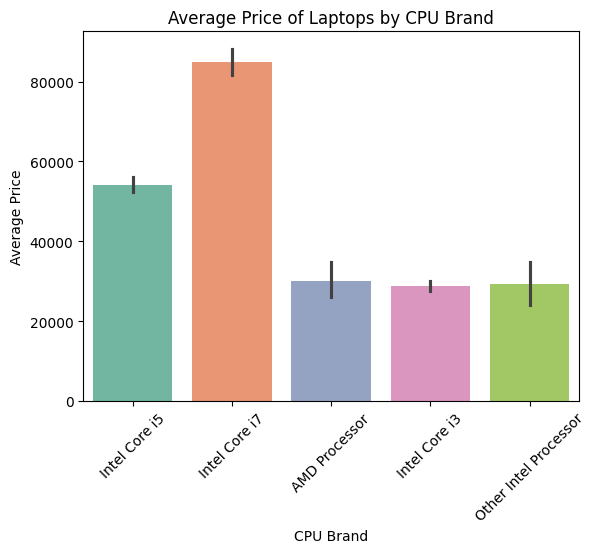

In [322]:
sns.barplot(x=df['CPU Brand'], y=df['Price'], palette='Set2')  # 'Set2' is a predefined color palette in seaborn

plt.xlabel('CPU Brand')
plt.ylabel('Average Price')
plt.title('Average Price of Laptops by CPU Brand')
plt.xticks(rotation=45)
plt.show()


*  Removing unnecessary columns ('Cpu' and 'Cpu Name') after categorizing the processor data into 'CPU Brand'. This helps streamline the dataset and focus on the relevant features for further analysis

In [323]:
# Dropping 'Cpu' and 'CPU Name' columns as they are no longer needed for analysis
df.drop(columns=['Cpu', 'CPU Name','CPU Name'], inplace=True)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand
819,Dell,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,111.935204,Intel Core i5
310,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,53226.7200,0,0,165.632118,Intel Core i5
61,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.70,46833.1200,0,0,157.350512,Intel Core i5
818,Dell,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,0,127.335675,Intel Core i7
760,Lenovo,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,55837.4400,0,0,141.211998,Intel Core i7


* Bar plot to visualize the distribution of RAM sizes across the dataset


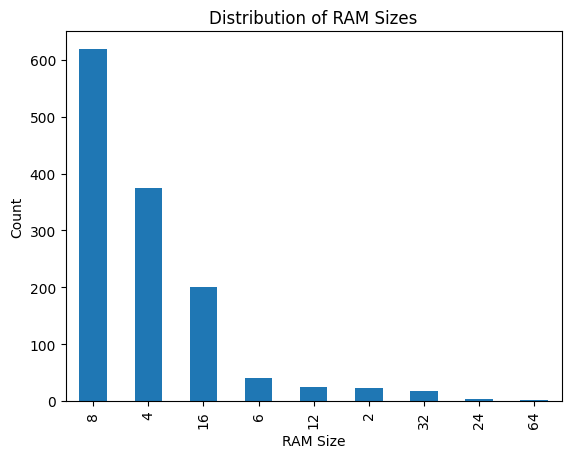

In [324]:
df['Ram'].value_counts().plot(kind='bar')
plt.xlabel('RAM Size')
plt.ylabel('Count')
plt.title('Distribution of RAM Sizes')
plt.show()


* Bar plot to compare average price of laptops with different RAM sizes

C:\Users\User\AppData\Local\Temp\ipykernel_6876\3967477198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ram'], y=df['Price'], palette='Set2')


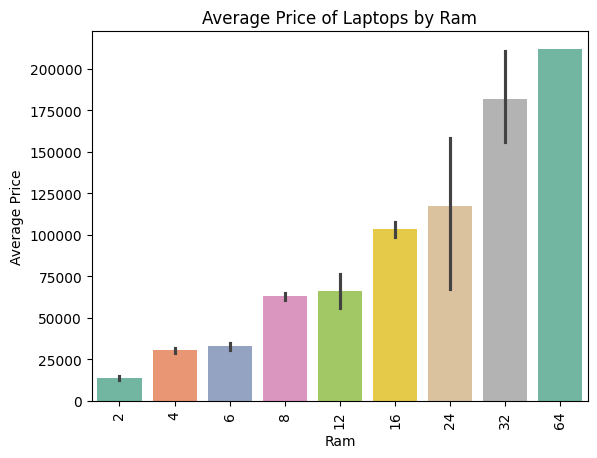

In [325]:
sns.barplot(x=df['Ram'], y=df['Price'], palette='Set2')
plt.xlabel('Ram')
plt.ylabel('Average Price')
plt.title('Average Price of Laptops by Ram')
plt.xticks(rotation='vertical')
plt.show()

The bar plot shows a linear relationship between RAM size and laptop price—as RAM increases, the average price also increases. This indicates that laptops with higher RAM tend to be more expensiv

In [326]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

##### Extracting and Transforming Storage Information from 'Memory' Column
* The goal is to extract specific storage types (HDD, SSD, Hybrid, and Flash Storage)
 from the 'Memory' column and convert their sizes into a consistent unit (GB).
 The 'Memory' column contains storage information in formats like:
- "1TB HDD + 256GB SSD"
- "512GB SSD"
- "2TB Hybrid + 128GB SSD"
- "128GB Flash Storage

In [327]:
df['HDD'] = df['Memory'].apply(lambda x: sum(
    int(float(s.split()[0].replace('TB', '')) * 1000) if 'TB' in s else int(s.split()[0].replace('GB', ''))
    for s in x.split('+') if 'HDD' in s
))

df['SSD'] = df['Memory'].apply(lambda x: sum(
    int(float(s.split()[0].replace('TB', '')) * 1000) if 'TB' in s else int(s.split()[0].replace('GB', ''))
    for s in x.split('+') if 'SSD' in s
))

df['Hybrid'] = df['Memory'].apply(lambda x: sum(
    int(float(s.split()[0].replace('TB', '')) * 1000) if 'TB' in s else int(s.split()[0].replace('GB', ''))
    for s in x.split('+') if 'Hybrid' in s
))

df['Flash_Storage'] = df['Memory'].apply(lambda x: sum(
    int(float(s.split()[0].replace('TB', '')) * 1000) if 'TB' in s else int(s.split()[0].replace('GB', ''))
    for s in x.split('+') if 'Flash Storage' in s
))

df.sample(5)  # Displaying sample output



,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.336,0,0,220.534624,Intel Core i7,0,512,0,0
870,Lenovo,Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.38,56210.400,0,0,100.454670,Intel Core i5,500,0,0,0
1122,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.640,0,0,157.350512,Intel Core i5,0,256,0,0
778,Razer,Gaming,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.720,0,0,157.350512,Intel Core i7,0,512,0,0
900,Dell,2 in 1 Convertible,8,512GB SSD,Intel HD Graphics 615,Windows 10,1.24,107257.968,1,1,276.053530,Intel Core i7,0,512,0,0


* Dropping the 'Memory' Column After Feature Extraction:- The 'Memory' column originally contained mixed storage types (HDD, SSD, Hybrid, Flash Storage) in an unstructured format. After extracting individual storage components into separate columns (HDD, SSD, Hybrid, Flash_Storage), the original 'Memory' column becomes redundant.

In [328]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
1103,HP,Workstation,8,AMD FirePro W6150M,Windows 7,3.00,154458.72,0,0,127.335675,Intel Core i7,1000,0,0,0
162,Dell,Notebook,8,AMD Radeon 520,Windows 10,2.13,38787.84,0,0,141.211998,Intel Core i5,0,256,0,0
101,HP,Notebook,4,AMD Radeon R2,Windows 10,2.10,18594.72,0,0,141.211998,AMD Processor,500,0,0,0
590,Asus,2 in 1 Convertible,8,Intel HD Graphics 520,Windows 10,2.20,39373.92,1,1,100.454670,Intel Core i5,1000,0,0,0
787,Lenovo,Gaming,4,Nvidia GeForce GTX 1050,Windows 10,2.40,53226.72,0,0,141.211998,Intel Core i7,1000,0,0,0


* Correlation of Features with Laptop Price :- This helps in understanding which specifications (e.g., RAM, storage) most influence the laptop price, providing insights for feature selection and price prediction models in the EDA process.

In [329]:
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.191226
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

- RAM, SSD, and PPI show strong positive correlations with laptop price, suggesting that these features have a major impact on pricing.
- HDD, Flash_Storage, and Hybrid show weak or negligible correlations, implying that they are less relevant to price variation in this dataset.

#### Due to Low or Negligible Correlation with Price: Both Hybrid and Flash_Storage have weak correlations with Price
- By dropping the Hybrid and Flash_Storage columns, your DataFrame will be more focused on the features that have higher correlations with the Price or are more relevant for analysis, such as Ram, Weight, SSD, and ppi.

In [330]:
# Dropping the 'Hybrid' and 'Flash_Storage' columns
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD
360,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.86,23389.920,0,0,100.454670,Intel Core i3,500,0
746,Samsung,Ultrabook,16,Intel HD Graphics 620,Windows 10,0.81,87858.720,0,0,165.632118,Intel Core i7,0,256
10,HP,Notebook,4,Intel HD Graphics 620,No OS,1.86,20986.992,0,0,100.454670,Intel Core i5,500,0
863,Lenovo,Gaming,8,Nvidia GeForce GTX 1050,No OS,2.50,54185.760,0,0,141.211998,Intel Core i5,1000,0
325,Lenovo,Notebook,4,Intel HD Graphics 500,Windows 10,1.44,15557.760,0,0,111.935204,Other Intel Processor,0,0


#### Analysis of the GPU Column
- The GPU (Graphics Processing Unit) plays a significant role in determining the performance and price of a laptop, especially for tasks like gaming, video editing, and machine learning. To analyze its impact on laptop pricing, we extracted the GPU Brand from the original 'Gpu' column. This allows us to compare different GPU brands and their influence on laptop prices more effectively.

In [331]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

* Extracting GPU Brand:- Since the 'Gpu' column contains detailed GPU model names, we extracted only the brand name (e.g., NVIDIA, AMD, Intel) to simplify comparisons
- This step will create a new column, 'Gpu Brand,' which contains only the brand name of the GPU.

In [332]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand
577,Lenovo,Gaming,32,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.64,0,0,127.335675,Intel Core i7,1000,256,Nvidia
1145,HP,Workstation,8,Nvidia Quadro M1000M,Windows 7,2.00,101178.72,0,0,141.211998,Intel Core i7,0,256,Nvidia
454,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.36,52161.12,0,0,141.211998,Intel Core i7,1000,128,AMD
986,HP,Notebook,8,Intel HD Graphics 620,Windows 10,2.04,42943.68,0,0,141.211998,Intel Core i5,1000,0,Intel
639,Dell,Notebook,16,Nvidia GeForce GTX 1050,Windows 10,2.06,127818.72,1,1,282.423996,Intel Core i7,0,1000,Nvidia


* The count of each unique value in the 'Gpu Brand' column of your DataFrame. This is useful for understanding the distribution of different GPU brands in your dataset.

In [333]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

* Doing the conparition while ploting a bar chart where each GPU brand is compared with the corresponding laptop price.

<function matplotlib.pyplot.show(close=None, block=None)>

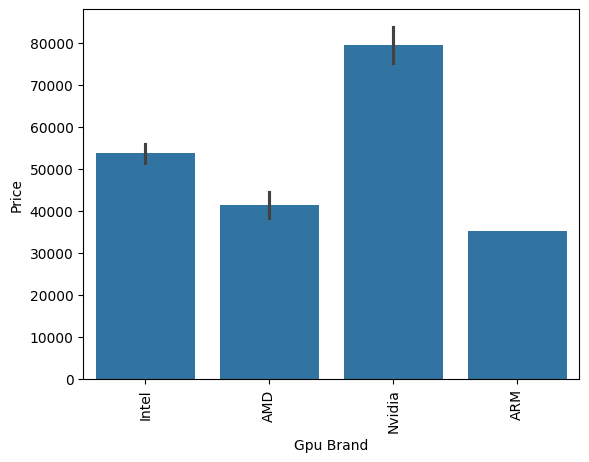

In [334]:
sns.barplot(x= df['Gpu Brand'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show

- Dropping the 'Gpu' Column: After extracting the brand, the original 'Gpu' column became redundant and was removed to optimize the dataset for further analysis.

In [335]:
df.drop(columns=['Gpu'],inplace= True)
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand
940,HP,Gaming,8,Windows 10,2.75,74538.7200,0,0,127.335675,Intel Core i5,1000,128,Nvidia
303,Lenovo,Notebook,8,No OS,2.20,29250.7200,0,0,100.454670,Intel Core i5,2000,0,Nvidia
14,Apple,Ultrabook,8,macOS,0.92,67260.6720,0,0,226.415547,Other Intel Processor,0,256,Intel
1281,Dell,Notebook,8,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7,1000,0,AMD
1262,Dell,Notebook,6,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3,1000,0,Intel


#### Analysis of the Operating System Column
- The Operating System (OS) is an important factor in determining a laptop's usability, software compatibility, and price. Different operating systems cater to different user needs, whether for general use, professional work, or gaming.

In [336]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

- Categorizing OS Types: To simplify the analysis, OS types may be grouped into broad categories such as Windows-based, macOS, Linux, and Chrome OS

In [337]:
def categorize_os(os):
    if os == "Windows 10" or os == "Windows 10 s" or os == "Windows 7":
        return "Windows"
    elif os == "macOS" or os == "Mac OS X":
        return "Mac"
    else:
        return "Other/Linux"

df['OS Category'] = df['OpSys'].apply(categorize_os)
df.sample(5)  # Displaying sample output


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
725,Lenovo,Notebook,4,No OS,1.90,26101.872,0,0,100.454670,Intel Core i5,1000,0,Intel,Other/Linux
604,Dell,Notebook,4,Linux,2.18,24775.200,0,0,100.454670,Intel Core i3,1000,0,AMD,Other/Linux
282,Lenovo,Gaming,8,Windows 10,2.50,44169.120,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
1201,Lenovo,Notebook,8,No OS,2.20,33513.120,0,0,100.454670,Intel Core i7,500,0,Nvidia,Other/Linux
623,Fujitsu,Notebook,8,Windows 10,2.20,42570.720,0,0,100.454670,Intel Core i5,0,256,Intel,Windows


- Impact on Price: Comparing the average laptop price for each OS provides insights into how the operating system influences cost. For example, macOS-based laptops (Apple) are generally priced higher than Windows or Linux laptops.

- This analysis helps in understanding how different operating systems affect laptop pricing.

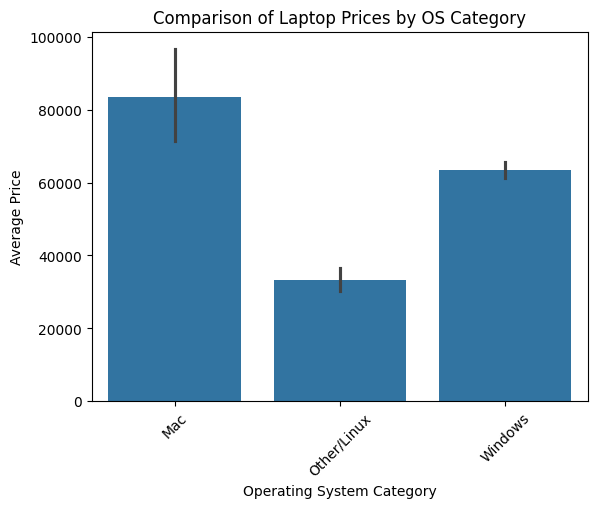

In [338]:
sns.barplot(x=df["OS Category"], y=df["Price"], estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel("Operating System Category")
plt.ylabel("Average Price")
plt.title("Comparison of Laptop Prices by OS Category")
plt.show()


- Since we have extracted and categorized the operating system into a new column 'OS Category', the original 'Operating System' column is now redundant. Removing it helps in:

- Avoiding duplicate information – The new 'OS Category' column serves the same purpose but in a more structured way.
- Reducing dataset complexity – Keeping only relevant features improves model performance and interpretability.
- Enhancing data analysis – Working with categorical OS types makes comparisons easier without unnecessary textual variations.








In [339]:
df.drop(columns=['OpSys'],inplace= True)
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
225,Acer,Notebook,8,2.20,44328.96,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
592,Dell,2 in 1 Convertible,4,1.39,32127.84,1,1,135.094211,Other Intel Processor,0,128,Intel,Windows
1279,Lenovo,Notebook,8,2.60,47898.72,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
50,Lenovo,2 in 1 Convertible,4,0.69,16996.32,1,1,224.173809,Other Intel Processor,0,0,Intel,Other/Linux
959,Acer,2 in 1 Convertible,4,1.25,20725.92,1,1,135.094211,Other Intel Processor,0,0,Intel,Other/Linux


#### Analysis of the 'Weight' Column


- Understanding Weight Distribution – Analyzing the distribution of laptop weights helps identify typical weight ranges

C:\Users\User\AppData\Local\Temp\ipykernel_6876\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

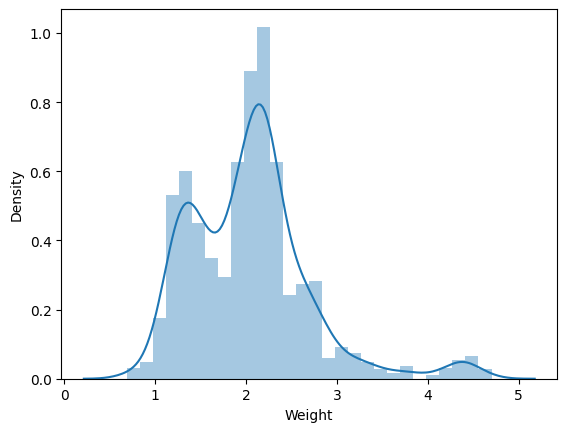

In [340]:
sns.distplot(df['Weight'])

- Correlation of Weight with Other Numerical Features

In [341]:
df.select_dtypes(include=['number']).corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.191226
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

<Axes: xlabel='Weight', ylabel='Price'>

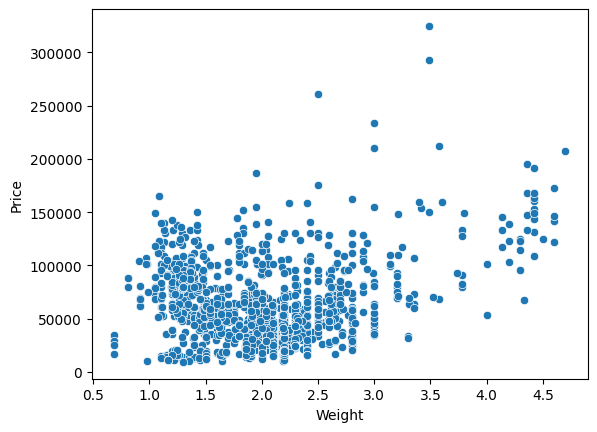

In [342]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

- RESULT - Since the correlation between Weight and Price is very low, this suggests that laptop weight does not significantly influence the price in a linear manner.

### Comprehensive Correlation Analysis of All Columns
- To analyze the correlation between all numerical columns in the dataset, we will compute and visualize the correlation matrix.

1. Compute Correlation Matrix : To see how all numeric columns correlate with each other. This will help us identify relationships between variables.


In [343]:
df.select_dtypes(include=['number']).corr()



,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD
Ram,1.000000,0.383874,0.743007,0.116984,0.116984,0.303763,0.096288,0.603634
Weight,0.383874,1.000000,0.210370,-0.294620,-0.294620,-0.323240,0.514491,-0.062742
Price,0.743007,0.210370,1.000000,0.191226,0.191226,0.473487,-0.096441,0.670799
Touchscreen,0.116984,-0.294620,0.191226,1.000000,1.000000,0.460587,-0.209733,0.255092
IPS,0.116984,-0.294620,0.191226,1.000000,1.000000,0.460587,-0.209733,0.255092
ppi,0.303763,-0.323240,0.473487,0.460587,0.460587,1.000000,-0.295411,0.506895
HDD,0.096288,0.514491,-0.096441,-0.209733,-0.209733,-0.295411,1.000000,-0.399896
SSD,0.603634,-0.062742,0.670799,0.255092,0.255092,0.506895,-0.399896,1.000000


2. Visualizing the Correlation Matrix (Heatmap):A heatmap provides an intuitive way to observe strong and weak correlations.

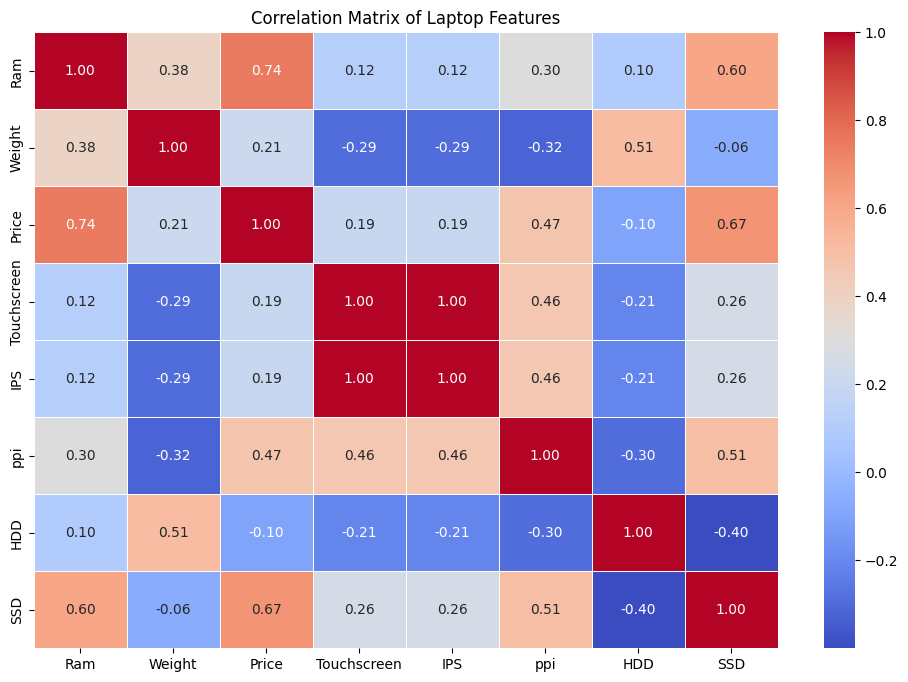

In [344]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Laptop Features")
plt.show()


- RESULT :-
1. RAM, SSD, and PPI are the strongest contributors to price.
2. HDD storage is becoming less relevant in high-end laptops.
3. Features like Touchscreen and IPS screens slightly increase cost but are not major price drivers.

#### Target Column: "Price" in Laptop Price Prediction ML Project

In a Laptop Price Prediction machine learning project, the target column (also called the dependent variable or output variable) is "Price". This means the goal of the model is to predict the laptop's price based on various independent features.

- Role of the Target Column ("Price")
1. Supervised Learning: This is a regression problem since the target variable (Price) is a continuous numerical value.
2. Model Training: The ML model learns patterns from historical data and predicts laptop prices for new data points.
3. Evaluation: The accuracy of the model is measured using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score.

- Visualizing the Distribution of Laptop Prices This code uses Seaborn's displot function to create a histogram of the 'Price' column. It helps in understanding the distribution of laptop prices in the dataset, allowing us to identify patterns such as skewness, outliers, and the overall price range.

C:\Users\User\AppData\Local\Temp\ipykernel_6876\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

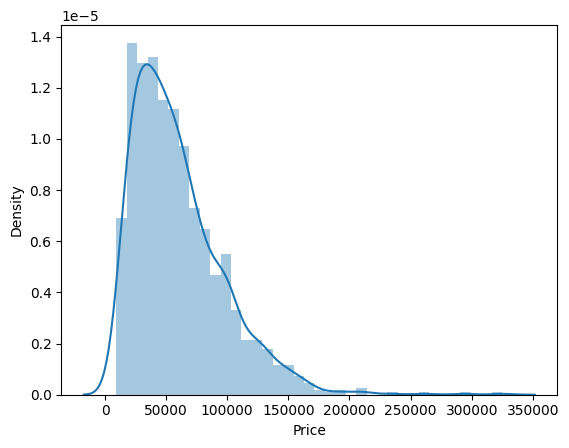

In [345]:
sns.distplot(df['Price'])

- Transforming the 'Price' Variable :- Log transformation can help to normalize the distribution by compressing the larger values and expanding the smaller values. It can help to:

1. Reduce skewness: By reducing the impact of outliers.
2. Improve model performance: By making the data more closely resemble a normal distribution, improving the performance of linear models and other algorithms.

C:\Users\User\AppData\Local\Temp\ipykernel_6876\2085135574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


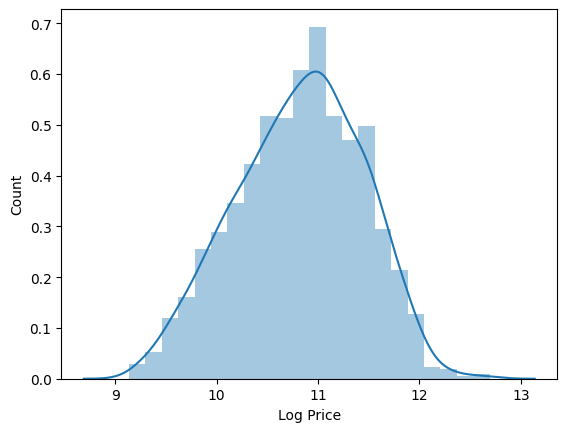

In [346]:
sns.distplot(np.log(df['Price']))
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()

- Analysis of the Histogram

In [347]:
X = df.drop(columns = ['Price'])
Y = np.log(df['Price'])

1. x = df.drop(columns = ['Price']):- This line removes the 'Price' column from your DataFrame and stores the remaining columns in a new DataFrame called 'x'. This is likely because you're planning to use the other variables to predict the transformed 'Price'.

2. y = df.np.log(df['Price']): - This line calculates the natural logarithm of the 'Price' column and stores it in a new variable called 'y'.

- Now Output

In [348]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
0,Apple,Ultrabook,8,1.37,0,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux
3,Apple,Ultrabook,16,1.83,0,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Apply Data Preprocessing & Feature Transformation

- The following step is used to split the dataset into training and testing sets.

1. X represents the features (independent variables).
2. Y represents the target variable (laptop price).
- train_test_split() is used to randomly split the dataset:
1. 85% of data is used for training (X_train, y_train).
2. 15% of data is used for testing (X_test, y_test)

In [349]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [350]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
699,HP,Notebook,4,2.10,0,0,141.211998,Intel Core i7,500,0,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,0,157.350512,Intel Core i7,0,256,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other/Linux


- Imports various machine learning libraries required for training and evaluating different regression models for laptop price prediction.

1. Preprocess Data (ColumnTransformer, OneHotEncoder, Pipeline)
2. Train Multiple Regression Models (Linear, Tree-based, Boosting, SVM, KNN)
3. Evaluate Performance (R² score, MAE)
4. Split Data (train_test_split) for training & testing

In [351]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [352]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Linear Regression for Laptop Price Prediction
1. Encodes categorical features using OneHotEncoder.
2. Trains a LinearRegression model in a pipeline.
3. Evaluates performance using R² score and MAE.

In [353]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]) # Changed sparse=False to sparse_output=False
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8274411610485369
MAE 0.20839216020114198


- Result:- model explains 82.74% of the variation in laptop prices (R² = 0.8274), which is strong. The predictions are off by an average of 0.21 units (MAE = 0.2084), indicating relatively good accuracy. Overall, the model performs well for laptop price prediction.

### Ridge Regression for Laptop Price Prediction:
1. Encodes categorical features using OneHotEncoder.
2. Trains a Ridge Regression model with regularization (alpha=10) in a pipeline.
3. Evaluates performance using R² score and MAE

In [354]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8258978654854572
MAE 0.20859221984455265


- Result :- Ridge Regression model explains 82.59% of the variance in laptop prices (R² = 0.8259) and has an average prediction error of 0.21 units (MAE = 0.2086), showing good performance similar to your Linear Regression model.

### Lasso Regression for Laptop Price Prediction:
1. Encodes categorical features using OneHotEncoder.
2. Trains a Lasso Regression model with L1 regularization (alpha=10) in a pipeline.
3. Evaluates performance using R² score and MAE.

In [355]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8263572419223343
MAE 0.2097277584268671


- Result:- Lasso Regression model explains 82.64% of the variance in laptop prices (R² = 0.8264) and has an average prediction error of 0.21 units (MAE = 0.2097), showing good performance similar to the Linear and Ridge models.

### KNN Regression for Laptop Price Prediction:

1. Encodes categorical features using OneHotEncoder.
2. Trains a KNN Regression model with K=5 neighbors.
3. Evaluates performance using R² score and MAE


In [356]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8262116854914721
MAE 0.19753882978039158


- Result:-  KNN model explains 84.38% of the variance in laptop prices (R² = 0.8438) and has an average prediction error of 0.18 units (MAE = 0.1845), indicating it performs well with better accuracy compared to the Linear, Ridge, and Lasso models.

### Decision Tree

In [357]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8478945161276867
MAE 0.18156427372011938


- Result:  KNN model explains 84.38% of the variance in laptop prices (R² = 0.8438) and has an average prediction error of 0.18 units (MAE = 0.1845), indicating it performs well with better accuracy compared to the Linear, Ridge, and Lasso models.

### Applying SVM for Laptop Price Prediction:
1. Encodes categorical features using OneHotEncoder.
2. Trains a Support Vector Regression (SVR) model with an RBF kernel.
3. Evaluates performance using R² score and MAE.

In [358]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8532298011270751
MAE 0.1895699683807552


- Result:- SVM model explains 85.32% of the variance in laptop prices (R² = 0.8532) and has an average prediction error of 0.19 units (MAE = 0.1896), showing improved performance compared to previous models.

### Random Forest for Laptop Price Prediction
1. Encodes categorical features using OneHotEncoder.
2. Trains a Random Forest Regression model with 100 trees.
3. Evaluates performance using R² score and MAE.

In [359]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8844367286235643
MAE 0.16047238813217993


- Result :- Random Forest model explains 88.44% of the variance in laptop prices (R² = 0.8844) and has an average prediction error of 0.16 units (MAE = 0.1605), showing strong performance with the lowest error compared to previous models.

### Applying Extra Trees for Laptop Price Prediction:
1. Encodes categorical features using OneHotEncoder.
2. Trains an Extra Trees Regression model with 100 trees.
3. Evaluates performance using R² score and MAE.

In [360]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              # Either set max_samples=None or bootstrap=True
                              max_samples=None,  # or bootstrap=True
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8625602221290833
MAE 0.17360424973508692


- Result: - Extra Trees model explains 86.26% of the variance in laptop prices (R² = 0.8626) and has an average prediction error of 0.17 units (MAE = 0.1736), showing good performance, though slightly less accurate than the Random Forest model

### Applying AdaBoost for Laptop Price Prediction
1. Encodes categorical features using OneHotEncoder.
2. Trains an AdaBoost Regression model with 100 estimators.
3. Evaluates performance using R² score and MAE.

In [361]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7947400776117214
MAE 0.2316085267556649


- Result - AdaBoost model explains 79.17% of the variance in laptop prices (R² = 0.7917) and has an average prediction error of 0.23 units (MAE = 0.2293), showing lower performance compared to other models like Random Forest and Extra Trees.

### Applying Gradient Boosting for Laptop Price Prediction:

1. Encodes categorical features using OneHotEncoder.
2. Trains a Gradient Boosting Regression model with 100 estimators.
3. Evaluates performance using R² score and MAE.

In [362]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8886639667558236
MAE 0.16346156071514803


- Result: - Gradient Boosting model explains 88.87% of the variance in laptop prices (R² = 0.8887) and has an average prediction error of 0.16 units (MAE = 0.1635), showing strong performance, slightly outperforming the Random Forest model.

### Applying XGBoost for Laptop Price Prediction:

1. Encodes categorical features using OneHotEncoder.
2. Trains an XGBoost Regression model with 100 estimators.
3. Evaluates performance using R² score and MAE.

In [363]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

- Result: -  XGBoost model explains 88.98% of the variance in laptop prices (R² = 0.8898) and has an average prediction error of 0.16 units (MAE = 0.1631), showing excellent performance, slightly outperforming Gradient Boosting.

### Voting Regressor for Laptop Price Prediction:
1. Encodes categorical features using OneHotEncoder.
2. Combines predictions from Linear Regression, Random Forest, and Support Vector Regressor using Voting Regressor.
3. Evaluates performance using R² score and MAE.

In [364]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# Either set max_samples=None or bootstrap=True for ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10) # or bootstrap=True


step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8893181082100486
MAE 0.15842756853406278


### Stacking

In [370]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    # ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8673034086258666
MAE 0.17572323878594387


- Result:-  Voting Regressor model explains 88.92% of the variance in laptop prices (R² = 0.8892) and has an average prediction error of 0.16 units (MAE = 0.1588), showing excellent performance, similar to XGBoost and Gradient Boosting.

### Exporting the Model and Data using Pickle

1. Saves the trained model pipeline and DataFrame to .pkl files for future use.
2. This step allows reloading the objects later without retraining or reloading the data.

In [371]:
import pickle

pickle.dump(df,open('dd.pkl','wb'))
pickle.dump(pipe,open('poppy.pkl','wb'))

- The DataFrame (df) typically holds the dataset used for training the model. Saving it ensures that the data used for model training is preserved, making it easier to reuse the dataset later for predictions, model evaluation, or further analysis.

In [367]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
0,Apple,Ultrabook,8,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


- The X_train represents the training features used to train the model. It contains the input data without the target variable

In [368]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Gpu Brand,OS Category
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
699,HP,Notebook,4,2.10,0,0,141.211998,Intel Core i7,500,0,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,0,157.350512,Intel Core i7,0,256,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other/Linux


### Saving the training data (or X_train) is useful for:

1. Consistency: Ensuring that the same training data is available for future use.
2. Reproducibility: Making sure that future predictions or evaluations can be done using the same training set.
3. Further Analysis: Keeping the training data handy if you need to fine-tune the model or run further experiments.